In [4]:
import sys

# Dodaj ścieżkę do katalogu, w którym znajduje się moduł
sys.path.append(r'C:\projekty\antelope_ml_cobot\cobot_ml')

from cobot_ml.data.datasets import CoBot20230708ForSVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score






In [8]:
ds = CoBot20230708ForSVM(None, None)

def cleanup_nans(array_with_nan):
    # Znalezienie indeksów wierszy zawierających przynajmniej jedno NaN
    nan_indices = np.any(np.isnan(array_with_nan), axis=1)

    # Wyświetlenie indeksów
    print("Indeksy wierszy zawierających przynajmniej jedno NaN:")
    print(np.nonzero(nan_indices)[0])

    # Usunięcie wierszy zawierających NaN
    return array_with_nan[~nan_indices]



selected_columns =[
       'WHEEL_DIAMETER',
       'FH.6000.[IS] - Inclination Signals.X inclination',
       'FH.6000.[IS] - Inclination Signals.Y inclination',
       'FH.6000.[NNS] - Natural Navigation Signals.Difference heading average correction',
       'FH.6000.[NNS] - Natural Navigation Signals.Distance average correction',
]




Loaded Cobot20230708: len(train)=8000, len(test)=113608


In [28]:
orig_df = ds.the_data.all_the_data[selected_columns]

normal_data = orig_df[orig_df['WHEEL_DIAMETER'] == 52.9]
X = normal_data.drop('WHEEL_DIAMETER', axis=1).head(5000)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X.shape)




(5000, 4)


In [29]:
X_test = orig_df.drop('WHEEL_DIAMETER', axis=1)
X_test_scaled = scaler.transform(X_test)
y_test = orig_df['WHEEL_DIAMETER'].apply(lambda x: 1 if x == 52.9 else -1)

In [30]:
clf = OneClassSVM(gamma='auto').fit(X_scaled)



In [31]:
y_pred = clf.predict(X_test_scaled)

In [32]:
# Ocena modelu
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.90      0.71     67116
           1       0.62      0.21      0.31     54492

    accuracy                           0.59    121608
   macro avg       0.60      0.55      0.51    121608
weighted avg       0.60      0.59      0.53    121608

Accuracy Score: 0.5886537069929609


C:\Users\pbenecki\AppData\Local\Temp\ipykernel_16044\2034603357.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_df['anomaly'] = y_pred


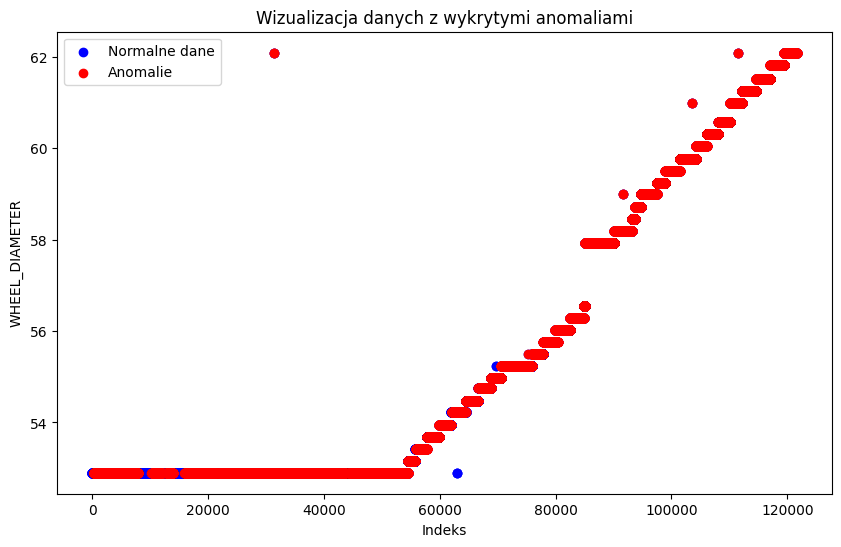

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Zakładając, że mamy DataFrame df i model One-Class SVM clf już wytrenowany oraz przeskalowane dane X_test_scaled
# df = wczytane dane
# clf = wytrenowany model One-Class SVM
# X_test_scaled = przeskalowane dane do testowania

# Dodanie predykcji do DataFrame
orig_df['anomaly'] = y_pred

# Wizualizacja
plt.figure(figsize=(10, 6))

# Rysowanie normalnych danych
plt.scatter(orig_df.index, orig_df['WHEEL_DIAMETER'], color='blue', label='Normalne dane')

# Rysowanie anomalii
anomalies = orig_df[orig_df['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['WHEEL_DIAMETER'], color='red', label='Anomalie')

plt.xlabel('Indeks')
plt.ylabel('WHEEL_DIAMETER')
plt.title('Wizualizacja danych z wykrytymi anomaliami')
plt.legend()

plt.show()
